# Import libraries

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import joblib

# Load Dataset and Analyze

In [2]:
# load the dataset and display the first five rows
df = pd.read_csv("student_data_train.csv")

In [3]:
# Display summary statistics of the training dataset
print("Summary Statistics of Training Data")
print(df.describe())

Summary Statistics of Training Data
       Attendance (%)  Assignment Completion (%)  Test Score (25%)  \
count    20000.000000               20000.000000       20000.00000   
mean        82.577750                  82.438200          16.42160   
std         10.941021                  11.063268           5.19622   
min         21.000000                   0.000000           8.00000   
25%         75.000000                  75.000000          12.00000   
50%         83.000000                  83.000000          16.00000   
75%         92.000000                  91.000000          21.00000   
max         99.000000                  99.000000          25.00000   

       Practical Score (25%)  Exam Score (50%)           Age  \
count           20000.000000      20000.000000  20000.000000   
mean               16.445550         28.938750     21.514850   
std                 5.182478         12.388405      2.293042   
min                 8.000000          8.000000     18.000000   
25%          

In [4]:
# Check for missing values in the training dataset
print("Checking for missing valuse in Training Data")
df.isnull().sum()

Checking for missing valuse in Training Data


Attendance (%)                             0
Assignment Completion (%)                  0
Test Score (25%)                           0
Practical Score (25%)                      0
Exam Score (50%)                           0
Performance                                0
Age                                        0
Gender                                     0
Marital Status                             0
Children (if Married)                      0
Mother Education                           0
Father Education                           0
Relationship with Student                  0
Extracurricular Activities                 0
Online Time (Daily)                        0
Family Relationship                        0
Free Time Activities                       0
Alcoholic Consumption                      0
Religious Programs (Weekly)                0
Computer/Laptop Access (for Practicals)    0
dtype: int64

# Data Preprocessing

In [5]:
# Convert categorical variables to numerical using Label Encoding
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

In [6]:
# split the data into features and target variable
X = df.drop('Performance', axis=1)
y = df['Performance']

In [7]:
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Creation and Training

In [8]:
# Create the decision tree classifier
clf = DecisionTreeClassifier()

In [9]:
# Train the model on the training data
clf.fit(X_train, y_train)

DecisionTreeClassifier()

# Model Prediction

In [10]:
# Make prediction on the test data
y_pred = clf.predict(X_test)

# Model Evaluation

In [11]:
# Calculate and print metrics 
print("Accuracy::", metrics.accuracy_score(y_test, y_pred))
print("Precision::", metrics.precision_score(y_test, y_pred, average='weighted'))
print("Recall::", metrics.recall_score(y_test, y_pred, average='weighted'))
print("F1-Score::", metrics.f1_score(y_test, y_pred, average='weighted'))

Accuracy:: 0.9345
Precision:: 0.9344313666222342
Recall:: 0.9345
F1-Score:: 0.934415637285568


In [12]:
# View classification report
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96      1266
           1       0.90      0.89      0.89      1006
           2       0.93      0.95      0.94       876
           3       0.96      0.96      0.96       628
           4       0.88      0.88      0.88       213
           5       1.00      1.00      1.00        11

    accuracy                           0.93      4000
   macro avg       0.94      0.94      0.94      4000
weighted avg       0.93      0.93      0.93      4000



In [13]:
# Save the trained model to a file
joblib.dump(clf, 'student_performance_predictor.joblib')

print("Model saved successfully.")

Model saved successfully.


# Calculate Feature Importance

In [14]:
importances = clf.feature_importances_
# Create a DataFrame to display feature importances
feature_importances = pd.DataFrame({'Feature' : X.columns, 'Importance' : importances})
feature_importances = feature_importances.sort_values('Importance', ascending=False)
print(feature_importances)

                                    Feature  Importance
4                          Exam Score (50%)    0.351162
0                            Attendance (%)    0.203528
3                     Practical Score (25%)    0.194778
2                          Test Score (25%)    0.183155
1                 Assignment Completion (%)    0.032586
5                                       Age    0.005278
13                      Online Time (Daily)    0.004410
10                         Father Education    0.003414
15                     Free Time Activities    0.003144
17              Religious Programs (Weekly)    0.003119
11                Relationship with Student    0.002850
8                     Children (if Married)    0.002628
16                    Alcoholic Consumption    0.002579
7                            Marital Status    0.001915
14                      Family Relationship    0.001727
9                          Mother Education    0.001646
6                                    Gender    0

# Visualizations

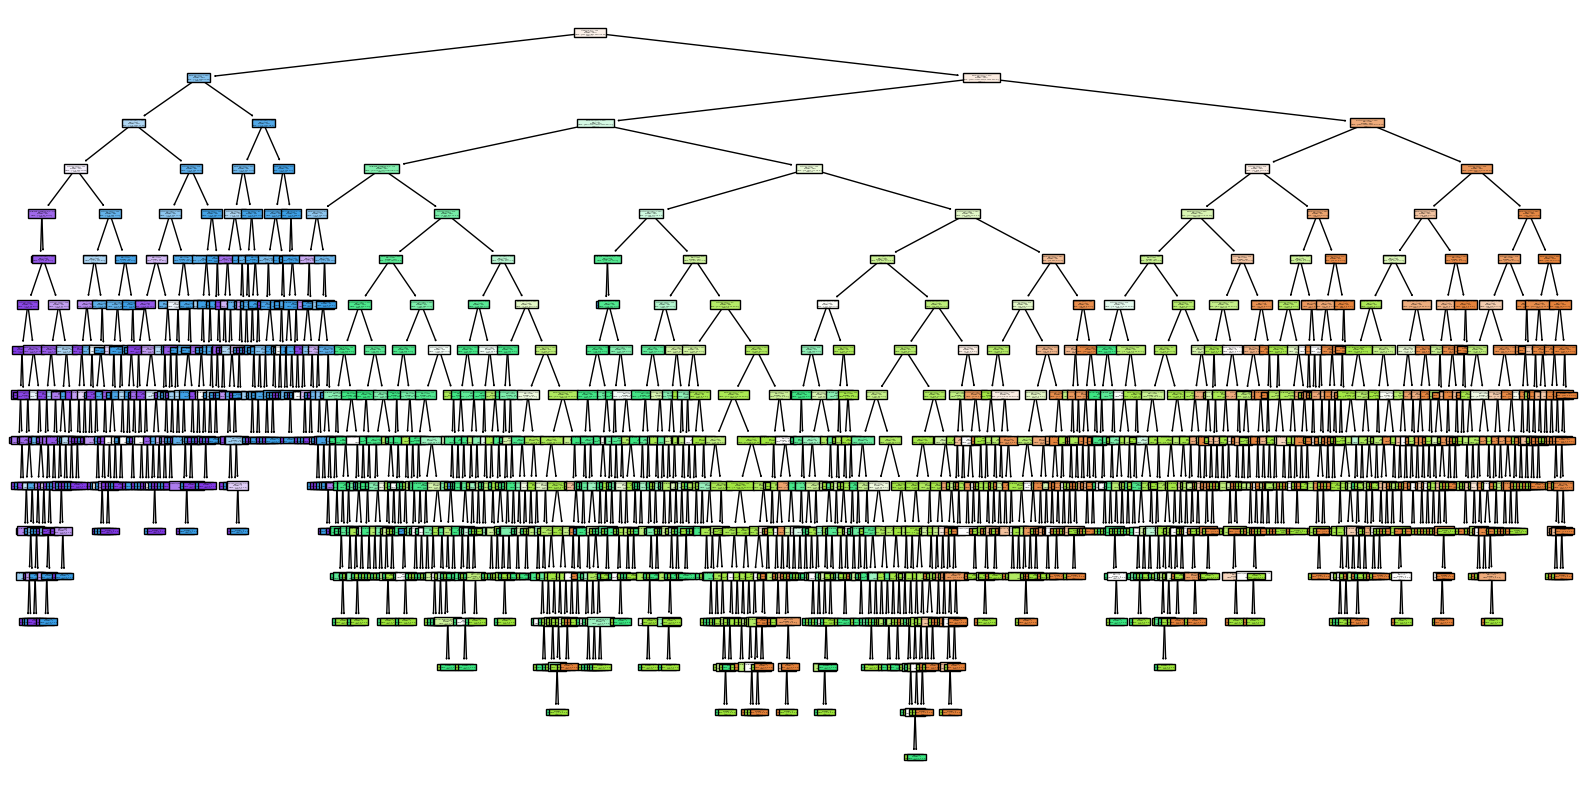

In [15]:
# Visualize the Decision Tree
plt.figure(figsize=(20,10))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=label_encoders['Performance'].classes_)
plt.show()

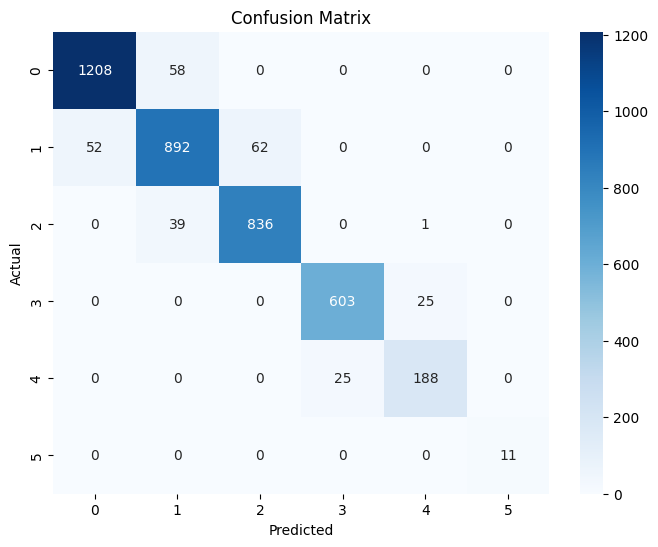

In [16]:
# Plot confusion matrix
plt.figure(figsize=(8, 6)) 
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues') 
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.savefig('confusion_matrix.jpg', dpi=300)
plt.show() 

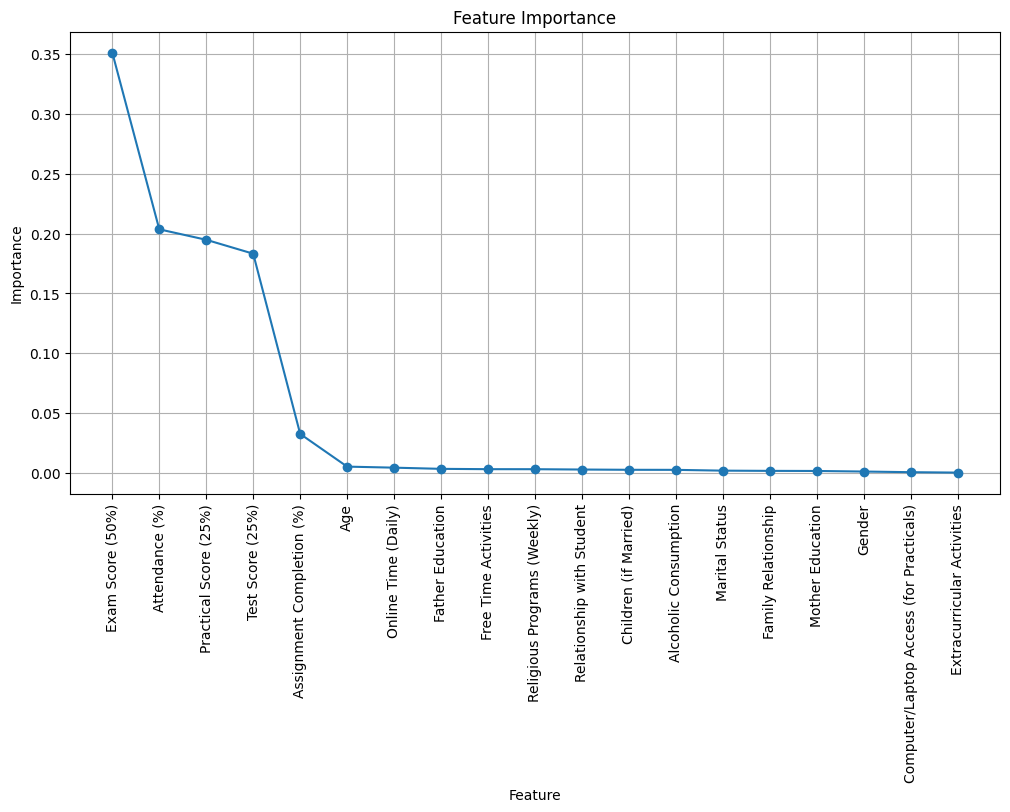

In [17]:
# Plot feature importances
plt.figure(figsize=(12, 6))
plt.plot(feature_importances['Feature'], feature_importances['Importance'], marker='o')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.savefig('feature_importance.jpg', dpi=300)
plt.show()

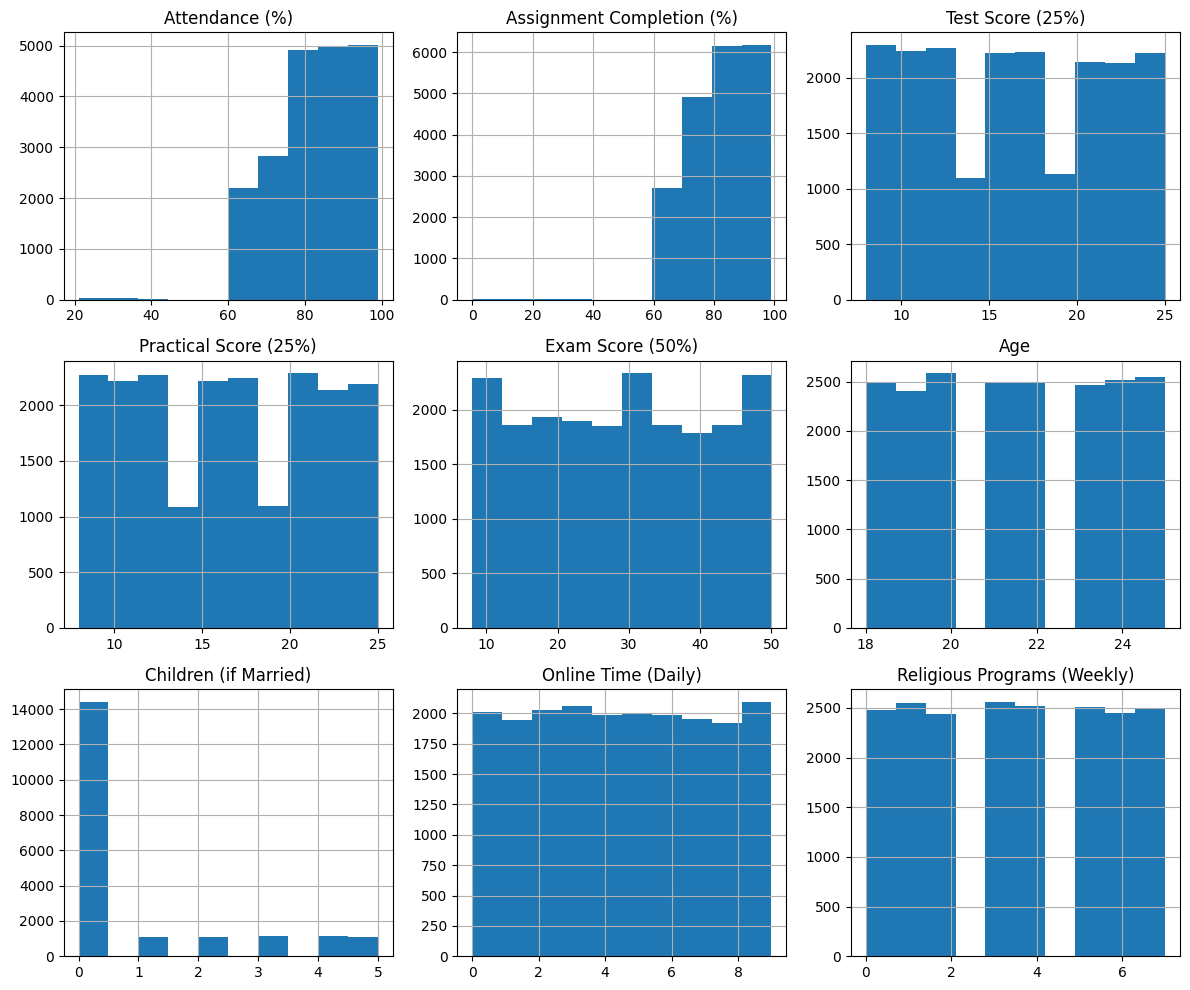

In [18]:
# Plot histograms for numerical features
numerical_features = df.select_dtypes(include=['float64', 'int64'])
numerical_features.hist(figsize=(12, 10))
plt.tight_layout()
plt.savefig('feature_visualizations.jpg', dpi=300)
plt.show()

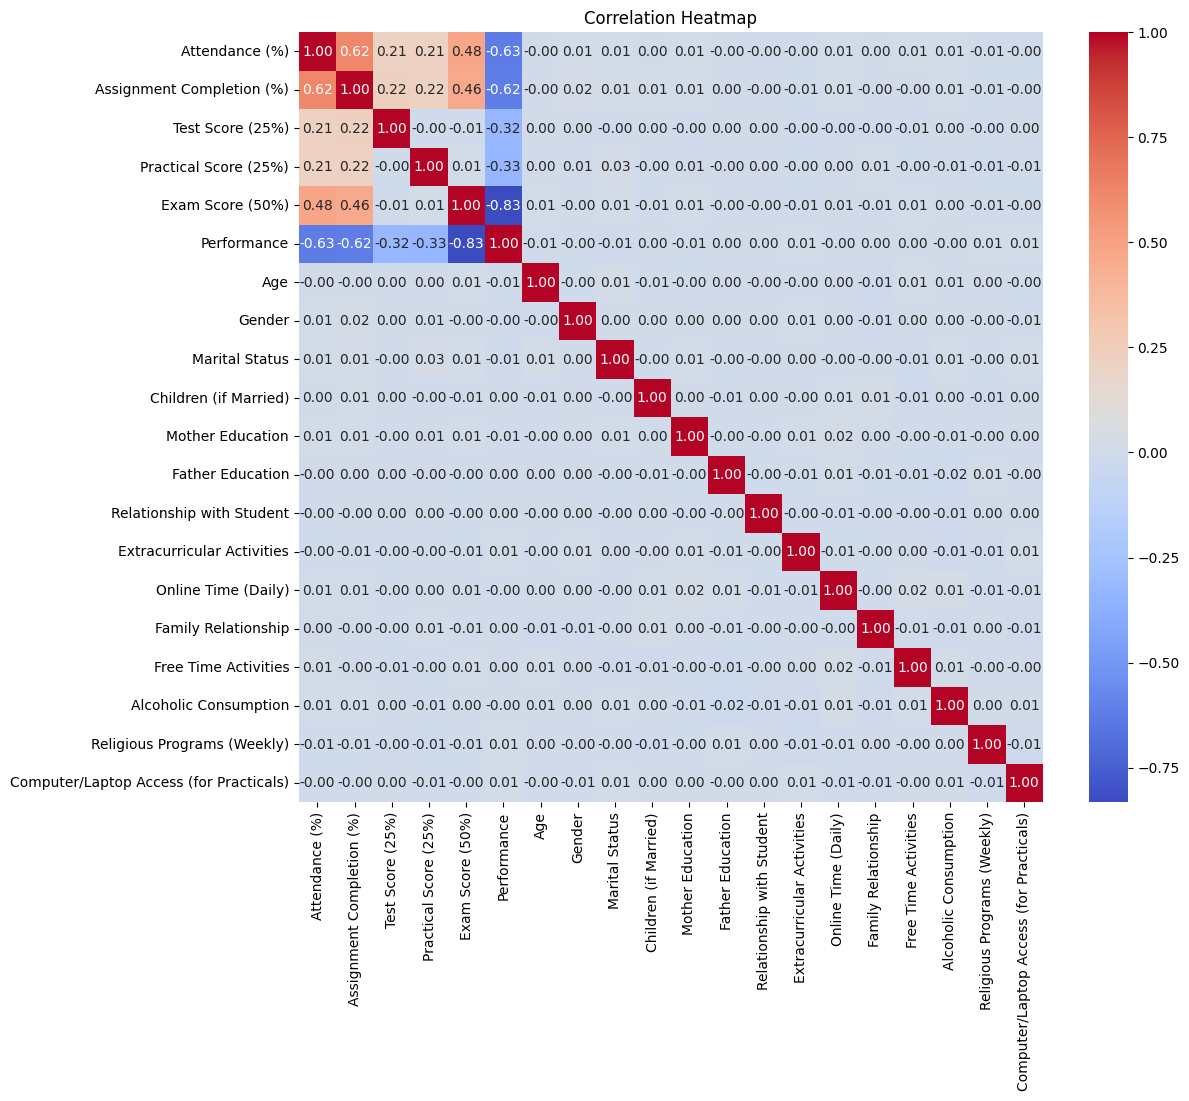

In [19]:
# Plot correlation matrix
corr = df.corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.savefig('correlation_heatmap.jpg', dpi=300)
plt.show()

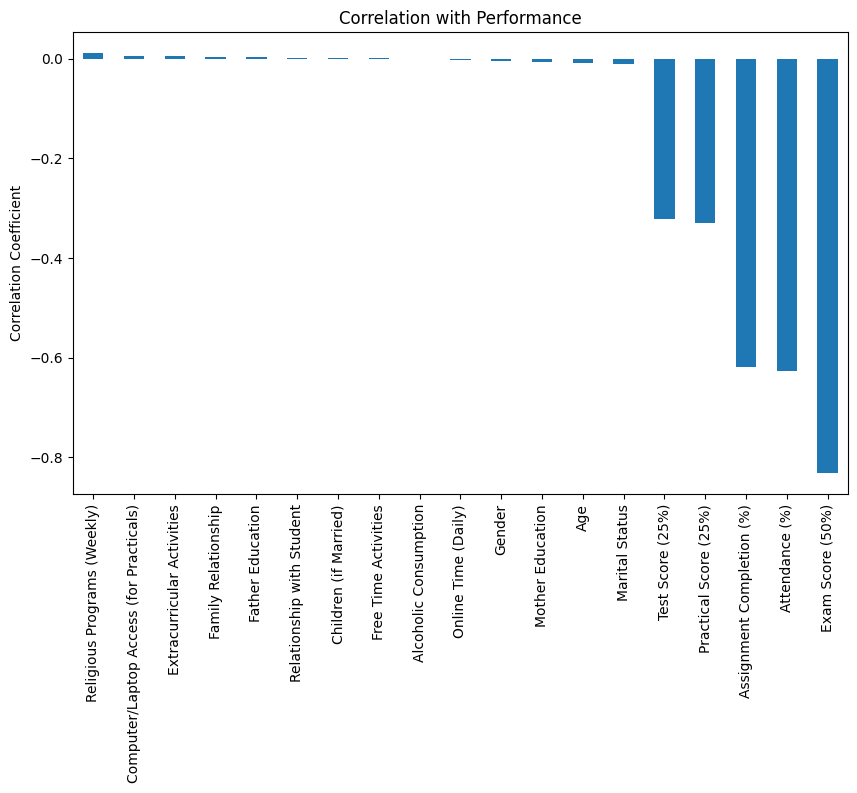

In [20]:
# Find correlations with Performance
correlations = df.corr()['Performance'].drop('Performance')
correlations = correlations.sort_values(ascending=False)

# Plot the correlations
plt.figure(figsize=(10, 6))
correlations.plot(kind='bar')
plt.title('Correlation with Performance')
plt.ylabel('Correlation Coefficient')
plt.savefig('feature_correlation.jpg', dpi=300)
plt.show()


# Test the Model

Accuracy on Test Data: 0.9228
Precision on Test Data: 0.922816847448067
Recall on Test Data: 0.9228
F1-Score on Test Data: 0.9227643714446869
              precision    recall  f1-score   support

           0       0.96      0.95      0.95      1634
           1       0.87      0.87      0.87      1179
           2       0.92      0.94      0.93      1125
           3       0.94      0.95      0.95       776
           4       0.87      0.84      0.85       264
           5       1.00      1.00      1.00        22

    accuracy                           0.92      5000
   macro avg       0.93      0.92      0.93      5000
weighted avg       0.92      0.92      0.92      5000



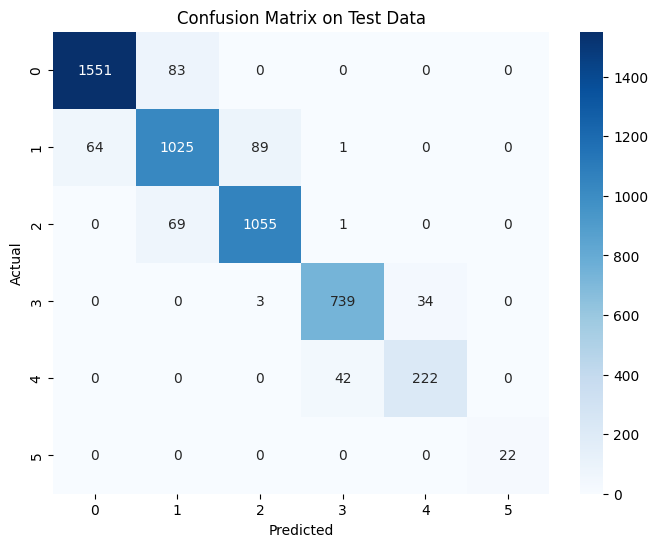

In [21]:
# Load the test dataset
df_test = pd.read_csv("student_data_test.csv")

# Apply label encoding to categorical variables
for column in df_test.select_dtypes(include=['object']).columns:
    df_test[column] = label_encoders[column].transform(df_test[column])

# Split the test dataset into features and target variable
X_test = df_test.drop('Performance', axis=1)
y_test = df_test['Performance']

# Make predictions on the test dataset
y_pred_test = clf.predict(X_test)

# Evaluate the model
print("Accuracy on Test Data:", metrics.accuracy_score(y_test, y_pred_test))
print("Precision on Test Data:", metrics.precision_score(y_test, y_pred_test, average='weighted'))
print("Recall on Test Data:", metrics.recall_score(y_test, y_pred_test, average='weighted'))
print("F1-Score on Test Data:", metrics.f1_score(y_test, y_pred_test, average='weighted'))
print(metrics.classification_report(y_test, y_pred_test))

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix on Test Data')
plt.savefig('confusion_matrix_test.jpg', dpi=300)
plt.show()
